## Feedback Prize - English Language Learning with Conv1D

## Import Packages

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split, KFold
import nltk

## Configuration

In [6]:
class Config:
    vocab_size = 2048
    embed_size = int(vocab_size ** 0.5)
    batch_size = 64
    epochs = 50
    maxlen = 768
    use_k_fold = True
    target_columns = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]
    dataset_path = "/kaggle/input/580-final-train"
config = Config() 

## Loading data

In [7]:
original = pd.read_csv(f"{config.dataset_path}/new_train.csv")

In [8]:
original.head()

,Unnamed: 0,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,...,adb,pronoun,noun,adj,fw,number,punc,total_score,ease_score,readability
0,0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,261,...,13,32,47,19,0,0,19,20.0,90.60,Very Easy
1,1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,...,25,57,89,42,0,2,18,14.5,66.64,Standard
2,2,00299B378633,"Dear, Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,320,...,15,32,68,21,0,0,26,18.0,79.80,Fairly Easy
3,3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,728,...,46,125,94,56,0,2,79,27.0,76.35,Fairly Easy
4,4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,...,5,30,59,12,0,1,3,16.5,17.69,Very Confusing


In [9]:
original['split'] = np.random.randn(original.shape[0], 1)
msk = np.random.rand(len(original)) <= 0.7
train = original[msk]
test = original[~msk]

In [10]:
train

,Unnamed: 0,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_length,...,pronoun,noun,adj,fw,number,punc,total_score,ease_score,readability,split
1,1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,...,57,89,42,0,2,18,14.5,66.64,Standard,-0.671361
2,2,00299B378633,"Dear, Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,320,...,32,68,21,0,0,26,18.0,79.80,Fairly Easy,-0.662384
4,4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,...,30,59,12,0,1,3,16.5,17.69,Very Confusing,0.334722
7,7,008DDDDD8E8D,I think it's a good idea for the estudnets to ...,2.5,2.5,2.5,2.5,2.5,2.0,388,...,31,81,29,0,1,38,14.5,78.99,Fairly Easy,-0.263613
8,8,009BCCC61C2A,positive attitude is the key to success. I agr...,3.0,3.0,3.5,3.5,3.0,3.0,569,...,100,73,44,0,3,28,19.0,63.32,Standard,1.292116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,FFAEAF8D0C90,"Soccer, all people like to play soccer, and ot...",2.5,2.0,2.5,1.5,2.0,2.0,496,...,18,146,26,0,1,48,12.5,63.40,Standard,-0.454638
3906,3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,179,...,21,49,9,0,0,11,17.0,52.46,Fairly Difficult,-0.694488
3907,3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,465,...,17,103,41,0,5,32,22.5,54.70,Fairly Difficult,1.636245
3908,3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,257,...,35,39,17,0,2,17,18.0,72.73,Fairly Easy,-0.160095


## Preprocessing

In [11]:
train["text"] = train["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
test["text"] = test["full_text"].apply(lambda sentence: " ". join(nltk.word_tokenize(sentence.lower())))
vectorizor = keras.layers.TextVectorization(
    max_tokens=config.vocab_size,
    output_sequence_length=config.maxlen
)
vectorizor.adapt(train["text"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
2022-11-28 02:44:14.591647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 02:44:14.685

## Building Model

In [12]:
def get_model():
    model = keras.Sequential([
        keras.Input(shape=(None, ), dtype="string"),
        vectorizor,
        keras.layers.Embedding(config.vocab_size, config.embed_size, input_length=config.maxlen),
        keras.layers.Conv1D(filters=64, kernel_size=16, activation="sigmoid"), # 
        keras.layers.AveragePooling1D(pool_size=8), # 
        keras.layers.Conv1D(filters=128, kernel_size=8, activation="softmax"), # relu -> softmax
        keras.layers.AveragePooling1D(pool_size=8),
        keras.layers.Conv1D(filters=256, kernel_size=4, activation="relu"),
        keras.layers.AveragePooling1D(pool_size=4),
        keras.layers.SpatialDropout1D(0.4),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(64, kernel_initializer='he_uniform', activation='swish'),#
        keras.layers.Dense(32, kernel_initializer='he_uniform', activation='swish'),
        keras.layers.Dense(16, kernel_initializer='he_uniform', activation='swish'),
        keras.layers.Dense(len(config.target_columns))
    ])
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    return model

In [13]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 768)               0         
_________________________________________________________________
embedding (Embedding)        (None, 768, 45)           92160     
_________________________________________________________________
conv1d (Conv1D)              (None, 753, 64)           46144     
_________________________________________________________________
average_pooling1d (AveragePo (None, 94, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 87, 128)           65664     
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 7, 256)            1

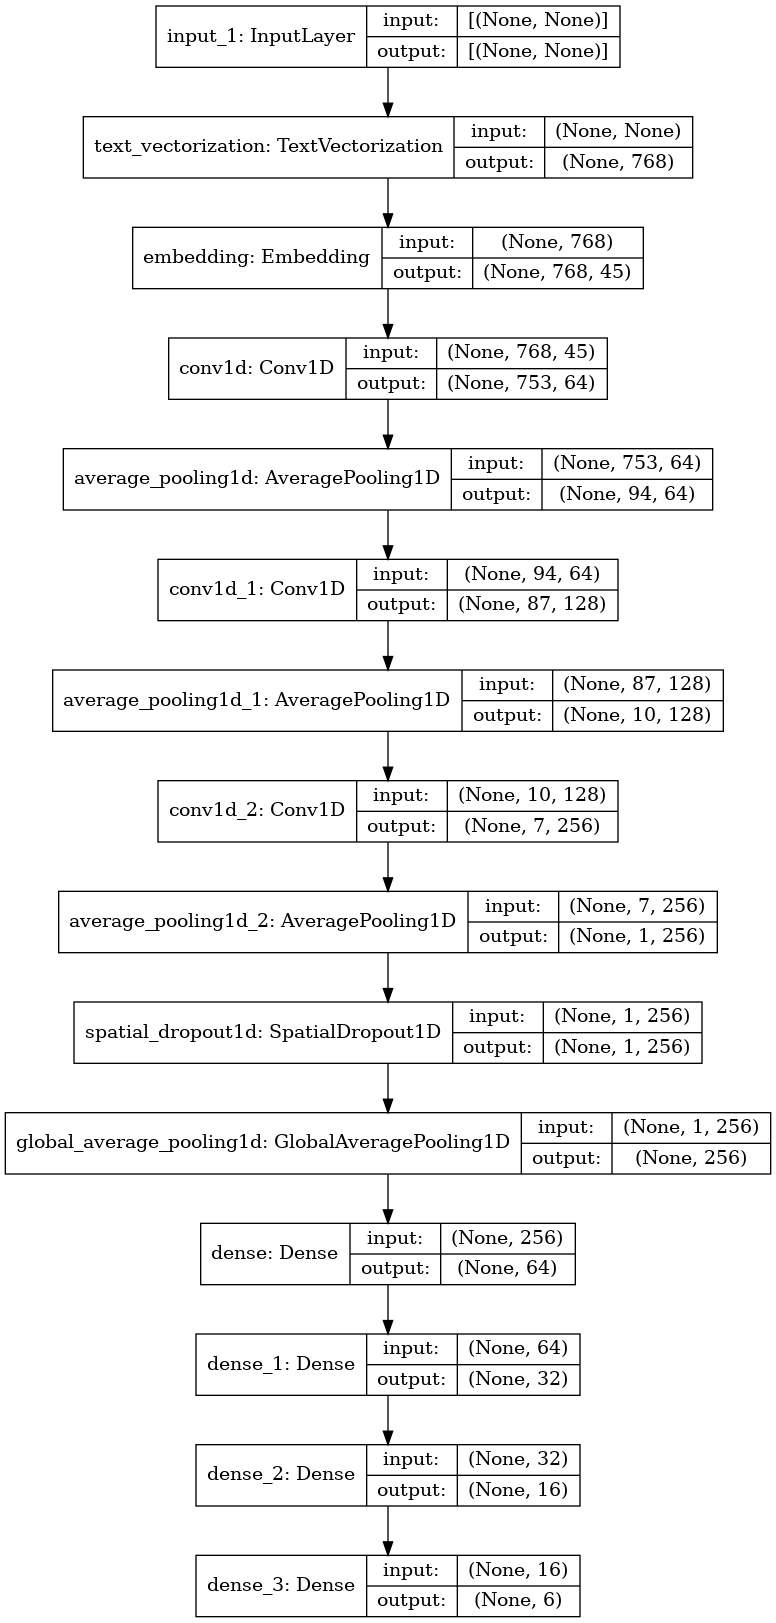

In [14]:
keras.utils.plot_model(model, show_shapes=True)

## Training models

In [15]:
keras.backend.clear_session()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
models = []
rmses = []
for i, (train_indices, valid_indices) in enumerate(kfold.split(train)):
    x_train = train.iloc[train_indices]["text"]
    y_train = train.iloc[train_indices][config.target_columns]
    x_val = train.iloc[valid_indices]["text"]
    y_val = train.iloc[valid_indices][config.target_columns]
    model_path = f"model_{i}.tf"
    model = get_model()
    rmse = tf.keras.metrics.RootMeanSquaredError(name="rmse")
    checkpoint = keras.callbacks.ModelCheckpoint(model_path, monitor="val_rmse", mode="min", save_best_only=True, save_weights_only=True)
    early_stop = keras.callbacks.EarlyStopping(monitor="val_rmse", mode="min", patience=5)
    model.compile(loss="mse", optimizer="adam", metrics=[rmse])
    history = model.fit(
        x_train, y_train, 
        batch_size=config.batch_size, 
        epochs=config.epochs,
        validation_data=(x_val, y_val),
        callbacks=[checkpoint, early_stop]
    )
    model.load_weights(model_path)
    result = model.evaluate(x_val, y_val)
    print("Loss:", result[0], "RMSE:", result[1])
    rmses.append(result[1])
    models.append(model) 
    if not config.use_k_fold:
        break
print(f"Mean RMSE:{np.mean(rmses)}")

Epoch 1/50


2022-11-28 02:44:20.837132: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


35/35 [==============================] - 9s 25ms/step - loss: 6.5307 - rmse: 2.5555 - val_loss: 0.9200 - val_rmse: 0.9592
Epoch 2/50
35/35 [==============================] - 1s 16ms/step - loss: 0.5982 - rmse: 0.7734 - val_loss: 0.4498 - val_rmse: 0.6706
Epoch 3/50
35/35 [==============================] - 1s 16ms/step - loss: 0.5036 - rmse: 0.7096 - val_loss: 0.4301 - val_rmse: 0.6558
Epoch 4/50
35/35 [==============================] - 1s 16ms/step - loss: 0.4904 - rmse: 0.7003 - val_loss: 0.4292 - val_rmse: 0.6551
Epoch 5/50
35/35 [==============================] - 1s 16ms/step - loss: 0.4765 - rmse: 0.6903 - val_loss: 0.4312 - val_rmse: 0.6566
Epoch 6/50
35/35 [==============================] - 1s 16ms/step - loss: 0.4628 - rmse: 0.6803 - val_loss: 0.4310 - val_rmse: 0.6565
Epoch 7/50
35/35 [==============================] - 1s 16ms/step - loss: 0.4562 - rmse: 0.6754 - val_loss: 0.4289 - val_rmse: 0.6549
Epoch 8/50
35/35 [==============================] - 1s 16ms/step - loss: 0.4507 

## Submission

In [16]:
preds = []
for model in models:
    preds.append(model.predict(test["text"]))
pred = np.mean(preds, axis=0)
submission = pd.DataFrame({
    "text_id": test["text_id"]
})
for i in range(len(config.target_columns)):
    column = config.target_columns[i]
    submission[column] = pred[:, i]
pred = np.mean(preds, axis=0)
submission.to_csv("submission.csv", index=False)

1182
